Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Ahmed"
COLLABORATORS = ""

---

# CS110 Pre-class Work 5.2

## Question 1.
Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

The list will be [1, 5, 6, 2, 3, 4, 7, 8, 9]
The value of i will be 5 corresponding to index 5 in python 

## Question 2.
Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [54]:
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0
    """
    # YOUR CODE HERE
    x= A[r]
    i = ( p-1 )         # -1 the beggining of the list (the border of the list) 
  
    for j in range(p , r): #iterating through the list, except the last item
  
        # If current element is smaller than the pivot 
        if   A[j] <= x: 
          
            # increase index of smaller element 
            i = i+1 
            A[i],A[j] = A[j],A[i] #exchange the two elements
  
    A[i+1],A[r] = A[r],A[i+1]
    return(i+1)
    #raise NotImplementedError()

In [56]:
A = [1,5,6,2,3,8,9,4,7]
B=[5,5,5,5,5,5,5]
C=[7,6,5,4,3,2,1]
print(partition(A, 0, len(A)-1)==6)
print(partition(B, 0, len(B)-1))
print(partition(C, 0, len(B)-1))

True
6
0


In [ ]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3.

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [29]:
def quick_sort(A,p,r):
    # YOUR CODE HERE
    #To sort an entire array A, the initial call is QUICKSORT(A,1,length(A))
    if p < r:
        q = partition(A,p,r)
        quick_sort(A,p,q-1)
        quick_sort(A,q+1,r)
    return (A)
    raise NotImplementedError()

In [45]:
A = [0]
print(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
print(quick_sort(A, 0, 2) == [1,2,3])
C=[7,6,5,4,3,2,1]
print(quick_sort(C, 0, len(C)-1))

True
True
[1, 2, 3, 4, 5, 6, 7]


In [ ]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4. 
Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


In [35]:
import time 
runtime1=[]
for k in range (1,16):
    list_k = [1 for i in range(100*k, 0, -1)]
    a= time.time()
    quick_sort(list_k,0,len(list_k)-1)
    b= time.time()
    runtime1.append(round(b-a, 5))
print(f"This operation took {runtime1} seconds.")

This operation took [0.00637, 0.02041, 0.03665, 0.06516, 0.08412, 0.12112, 0.21046, 0.30701, 0.43026, 0.45057, 0.46557, 0.57627, 0.64014, 0.75652, 0.9061] seconds.


In [36]:
import time 
runtime2=[]
for k in range (1,16):
    list_k = [i for i in range(100*k, 0, -1)]
    a= time.time()
    quick_sort(list_k,0,len(list_k)-1)
    b= time.time()
    runtime2.append(round(b-a, 5))
print(f"This operation took {runtime2} seconds.")

This operation took [0.00643, 0.02056, 0.0477, 0.09559, 0.094, 0.10528, 0.16531, 0.16618, 0.22045, 0.29293, 0.31624, 0.42781, 0.5745, 0.4835, 0.6961] seconds.


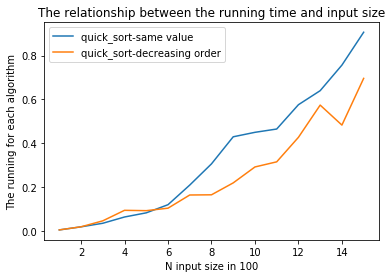

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
x = [i for i in range(1,16)]


fig, ax = plt.subplots()

ax.plot(x,runtime1, label="quick_sort-same value")
ax.plot(x,runtime2, label="quick_sort-decreasing order")

ax.set_xlabel('N input size in 100')
ax.set_ylabel('The running for each algorithm')
ax.set_title('The relationship between the running time and input size')

leg = ax.legend();

In the case when all items have the same value, the partition will keep swapping all the numbers as they have the same value and the if statment will be always true. This is the worst case partitioning, where the partitioning routine produces one subproblem with n - 1 elements and one with 0 elements. Thus, the running time will be theta(n^2)

In the case when all items are in decending order, the algorithm will have an average partitioning, with running time proportional to
O(n log n) . 
